In [2]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Avoid memory issues due to the GPU being the limiting factor

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)




In [3]:
!pip install plotly

In [13]:
from pylab import rcParams
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
ls '/content/drive/My Drive/gtsrb/'

0/   11/  14/  17/  2/   22/  25/  28/  30/  33/  36/  39/  41/  6/  9/
1/   12/  15/  18/  20/  23/  26/  29/  31/  34/  37/  4/   42/  7/
10/  13/  16/  19/  21/  24/  27/  3/   32/  35/  38/  40/  5/   8/


In [7]:
import imghdr

In [14]:
data_dir = '/content/drive/My Drive/gtsrb-small/'

In [15]:
image_extensions = ['.jpg', '.png', '.jpeg', '.bmp', '.tif', '.ppm', '.gif', '.tiff']
image_extensions[5]

os.listdir(os.path.join(data_dir))

['.DS_Store', '2', '0', '1']

In [11]:
from sklearn.model_selection import train_test_split

# Time epoch is 10, in ML an epoch is one complete iterative pass of the dataset
EPOCHS = 10
# images are resized into 30 pixels by 30 pixels
# images do not need to be traversed pixel by pixel, but by the entire image size.
IMG_WIDTH = 30
IMG_HEIGHT = 30
# There are 43 categories of folders with images
# Changed to 3 for testing purposes, change back to 43
NUM_CATEGORIES = 3
# The size of the testing data
TEST_SIZE = 0.4

In [25]:
data = data_dir + str(['0', '1', '2'])

In [28]:
tf.data.Dataset.list_files(data)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [31]:
tf.keras.utils.image_dataset_from_directory??

In [32]:
data_iteration = data.as_numpy_iterator()

AttributeError: ignored

In [125]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    # init images and levels
    images = []
    labels = []

    # List of folders you want to process (0, 1, 2)
    image_exts = [''''jpg', 'jpeg', 'png', 'gif',''' '.ppm']  # Add the image extensions you want to keep
    # Iterate through each folder
    for category in range(NUM_CATEGORIES):
        category_dir = os.path.join(data_dir, str(category))
        # if data is not in category_dir, print message
        if not os.path.isdir(category_dir):
            print(f"Skipping non-directory: {category_dir}")
            continue  # Skip non-directories

        for image in os.listdir(category_dir):
            try:
                image_path = os.path.join(category_dir, image)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

                if img is not None:
                    images.append(img)
                    labels.append(category)
                else:
                    print(f"Skipped invalid Images: {image_path}")
            except Exception as e:
                print(f"Issue with image: {image_path}")
                print(str(e))
                os.remove(image_path)  # This line should align with the start of the 'except' block
    '''plt.imshow(images)
    plt.show()'''
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return (images, labels)



In [126]:
def main():

    # Check command-line arguments - sys.argv is either 2 or 3, if there are not 2 or 3 arguments, exit the program
    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files, from the load_data function return two items, images and labels
    images, labels = load_data(sys.argv[1])

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()

    # Fit model on training data
    model.fit(x_train, y_train, epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)

    print(f"Correct: {(y_test == predictions).sum()}")
    print(f"Incorrect: {(y_test != predictions).sum()}")

    # Save model to file
    if len(sys.argv) == 3:
        filename = sys.argv[2]
        model.save(filename)
        print(f"Model saved to {filename}.")

In [131]:
data = tf.keras.utils.image_dataset_from_directory('data')

NotFoundError: ignored

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    raise NotImplementedError



if __name__ == "__main__":
    main()


Week_5/gtsrb-small/0


FileNotFoundError: ignored

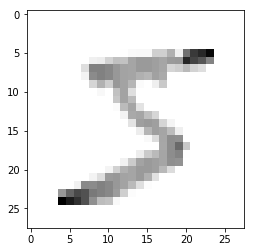

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

print(x_train[0])


In [ ]:
model.save('epic_num_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict([x_test])

AttributeError: ignored

In [ ]:
print(predictions)

In [ ]:
import numpy as np

print(np.argmax(predictions[0]))

NameError: ignored